# This example shows how to perform a selfconsistent calculation with local interactions for a honeycomb lattice
### Import the necessary libraries

In [1]:
# Add the root path of the pyqula library
import os ; import sys
sys.path.append(os.getcwd()+"/../../src")


# import numpy and pyqula
import numpy as np
import matplotlib.pyplot as plt
from pyqula import geometry

### Create the geometry of the honeycomb lattice model, and its first neighbor Hamiltonian
$$ H = \sum_{\langle ij \rangle} c^\dagger_i c_j $$
where $\langle ij \rangle $ denotes first neighbors in the honeycomb lattice

In [2]:
g = geometry.honeycomb_lattice() # create the geometry
h = g.get_hamiltonian() # create hamiltonian of the system

### Perform a selfconsistent calculation including repulsive local Hubbard interactions
$$ H_U = U\sum_i c^\dagger_{i,\uparrow} c_{i,\uparrow} c^\dagger_{i,\downarrow} c_{i,\downarrow} \approx 
U\sum_i \langle c^\dagger_{i,\uparrow} c_{i,\uparrow} \rangle c^\dagger_{i,\downarrow} c_{i,\downarrow} +
U\sum_i c^\dagger_{i,\uparrow} c_{i,\uparrow} \langle c^\dagger_{i,\downarrow} c_{i,\downarrow} \rangle $$

In [3]:
Us = np.linspace(0.,4.0,20) # different values of U
Ms = [] # empty list for the AF order
for U in Us:
    hscf = h.get_mean_field_hamiltonian(U=U,mf="antiferro",mix=0.9,nk=20) # perform SCF calculation
    mz = hscf.extract("mz") # extract the magnetization
    Ms.append(mz[0]-mz[1]) # store the stagger magnetization

### Plot the magnetization VS Hubbard interaction

Text(0.5, 0, 'U/t')

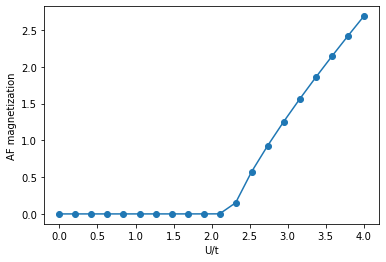

In [4]:
plt.plot(Us,Ms,marker="o") # do a scatter plot
plt.ylabel("AF magnetization") # set the y label 
plt.xlabel("U/t") # set the y label 


### Diagonalize the non-interacting and interacting Bloch Hamiltonian
The following function will obtain the Bloch eigenvalues $\epsilon_k$ defined as
$$ H \left | \Psi_k \right \rangle = \epsilon_k \left | \Psi_k \right \rangle $$

In [5]:
(k,e) = h.get_bands() # get the bandstructure
hscf = h.get_mean_field_hamiltonian(U=3.0,mf="antiferro",mix=0.9,nk=20) # perform SCF calculation with U=3t
(kscf,escf) = hscf.get_bands() # get the bandstructure

### Plot the Bloch band structure in the path

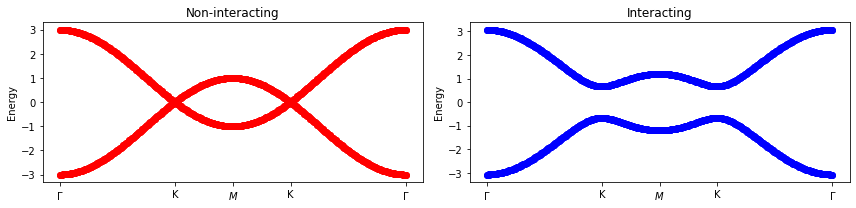

In [6]:
fig = plt.figure(figsize=(12, 3)) # set the right ratio
plt.subplot(121)
plt.title("Non-interacting")
plt.scatter(k/max(k),e,c="red") # do a scatter plot
plt.ylabel("Energy") # set the y label 
plt.xticks([0.,1./3.,0.5,2./3.,1.],["$\Gamma$",'K',"$M$",'K',"$\Gamma$"])


plt.subplot(122)
plt.title("Interacting")
plt.scatter(kscf/max(kscf),escf,c="blue") # do a scatter plot
plt.ylabel("Energy") # set the y label 
plt.xticks([0.,1./3.,0.5,2./3.,1.],["$\Gamma$",'K',"$M$",'K',"$\Gamma$"])


plt.tight_layout()
plt.show()

